# Introduction
    Since the current dataset(wine quality dataset) doesn't include any pricing information, we could predict the price using another dataset that contains the information.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the data

In [3]:
wine_price = pd.read_csv("wine_sales_data.csv")
display(wine_price.sample(20))
display(wine_price.info())
display(wine_price.describe())

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
48677,48677,South Africa,"Fresh eucalyptus, pepper and savory spice star...",NaN,87,13.0,Western Cape,NaN,NaN,Merlot,Porcupine Ridge
143417,143417,Chile,"Mouthfilling, with plump citrus flavors. The b...",NaN,82,12.0,Maule Valley,NaN,NaN,Sauvignon Blanc,Loica
49603,49603,US,"Not as successful as the winery's Cabernet, th...",Chicken Ranch Vineyard,87,30.0,California,Rutherford,Napa,Merlot,Trinchero
92916,92916,US,A perfect score has to be considered in the co...,Hillside Select,100,215.0,California,Stags Leap District,Napa,Cabernet Sauvignon,Shafer
94476,94476,US,"A high-acid white, with grapefruit, pineapple ...",Boushey Vineyard,88,25.0,Washington,Yakima Valley,Columbia Valley,Grenache Blanc,McCrea
147012,147012,US,The straw brown color suggests a wine that is ...,NaN,87,12.0,Oregon,Willamette Valley,Willamette Valley,Pinot Gris,Airlie
12450,12450,Argentina,This huge Malbec defines jammy and concentrate...,Marchiori Vineyard Block C2,92,215.0,Mendoza Province,Perdriel,NaN,Malbec,Viña Cobos
30458,30458,France,"Santenots, like most premier crus, is located ...",Santenots Premier Cru,93,70.0,Burgundy,Volnay,NaN,Pinot Noir,Louis Jadot
137548,137548,US,"The Gamache brothers call this blend, which is...",Boulder,87,18.0,Washington,Columbia Valley (WA),Columbia Valley,Red Blend,Gamache
47968,47968,France,"While it still has firm tannins, the wine is n...",NaN,92,119.0,Burgundy,Gevrey-Chambertin,NaN,Pinot Noir,Domaine Henri Rebourseau


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


None

,Unnamed: 0,points,price
count,150930.000000,150930.000000,137235.000000
mean,75464.500000,87.888418,33.131482
std,43569.882402,3.222392,36.322536
min,0.000000,80.000000,4.000000
25%,37732.250000,86.000000,16.000000
50%,75464.500000,88.000000,24.000000
75%,113196.750000,90.000000,40.000000
max,150929.000000,100.000000,2300.000000


#### Prepare the data

In [4]:
# remove unnecessary columns and filter country an province(Only Portugal & Vinho Verde)
wine_price.drop(["Unnamed: 0", "description", "designation", "region_1", "region_2", "variety", "winery"], axis=1, inplace=True)
wine_price["country"] = "Portugal"
wine_price["province"] = "Vinho Verde"

display(wine_price.value_counts)

<bound method DataFrame.value_counts of          country  points  price     province
0       Portugal      96  235.0  Vinho Verde
1       Portugal      96  110.0  Vinho Verde
2       Portugal      96   90.0  Vinho Verde
3       Portugal      96   65.0  Vinho Verde
4       Portugal      95   66.0  Vinho Verde
...          ...     ...    ...          ...
150925  Portugal      91   20.0  Vinho Verde
150926  Portugal      91   27.0  Vinho Verde
150927  Portugal      91   20.0  Vinho Verde
150928  Portugal      90   52.0  Vinho Verde
150929  Portugal      90   15.0  Vinho Verde

[150930 rows x 4 columns]>

#### Remove the NaN

In [5]:
wine_price_new = wine_price.dropna()
print(wine_price_new.info())

<class 'pandas.core.frame.DataFrame'>
Index: 137235 entries, 0 to 150929
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   country   137235 non-null  object 
 1   points    137235 non-null  int64  
 2   price     137235 non-null  float64
 3   province  137235 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 5.2+ MB
None


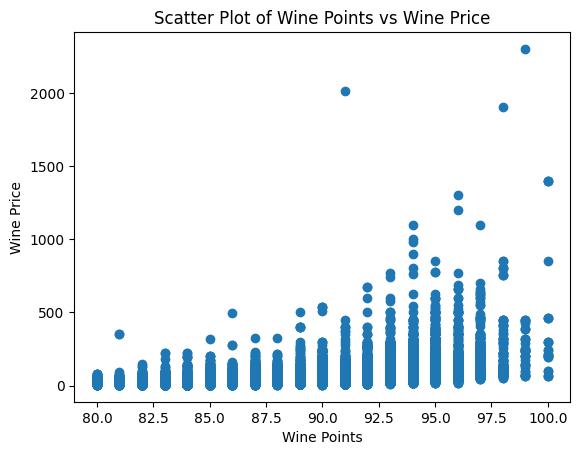

In [7]:
x = wine_price_new['points']
y = wine_price_new['price']

plt.scatter(x, y)
plt.title('Scatter Plot of Wine Points vs Wine Price')
plt.xlabel('Wine Points')
plt.ylabel('Wine Price')
plt.show()

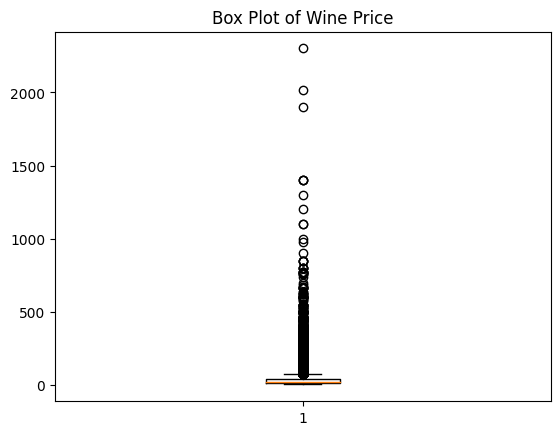

In [8]:
data = wine_price_new['price']

plt.boxplot(data)
plt.title('Box Plot of Wine Price')
plt.show()


#### Remove the Outliers

In [9]:
# Find IQR 
Q1 = wine_price_new["price"].quantile(0.25)
Q3 = wine_price_new["price"].quantile(0.75)
IQR = Q3 - Q1

# Confirm the range
condition = (wine_price_new["price"] > Q3 + 1.5*IQR) | (wine_price_new["price"] < Q1 - 1.5*IQR)

# Remove the outliers
outliers = wine_price_new[condition].index
wine_price_new.drop(outliers, inplace=True)
display(wine_price_new["price"].describe())


/var/folders/ll/22q89fv95hbb3yt5tf_x_5lc0000gp/T/ipykernel_58241/1756654397.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_price_new.drop(outliers, inplace=True)


count    129653.000000
mean         27.397870
std          15.687715
min           4.000000
25%          15.000000
50%          23.000000
75%          36.000000
max          76.000000
Name: price, dtype: float64

# Hypothesis : Price will increase with points

### Initial visual analysis

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Wine Price')

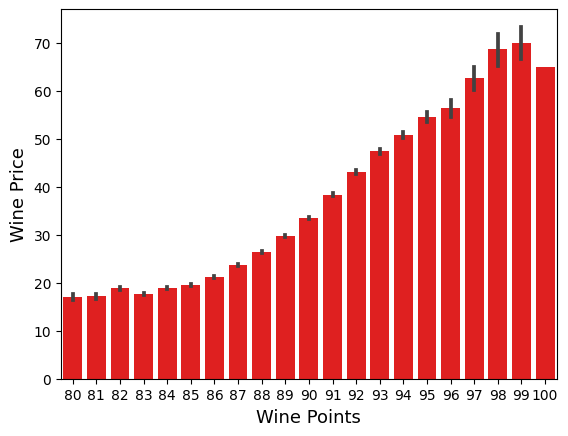

In [10]:
# seems to be a pattern indicating price would be increase with points

sns.barplot(x="points", y="price", data=wine_price_new, color='red')
plt.xlabel("Wine Points",fontsize =13)
plt.ylabel("Wine Price", fontsize =13)

### For comparing with wine quality dataset, cut points into 3 levels (because I have 3 labels on wine quality - low, medium, high). 

In [11]:
wine_price_new['points'] = wine_price_new['points'].apply(lambda value: 'low'
if value <= 86 else 'medium'
if value <= 93 else 'high')
wine_price_new['points'] = pd.Categorical(wine_price_new['points'],
categories=['low', 'medium', 'high'])


/var/folders/ll/22q89fv95hbb3yt5tf_x_5lc0000gp/T/ipykernel_58241/2829429867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_price_new['points'] = wine_price_new['points'].apply(lambda value: 'low'
/var/folders/ll/22q89fv95hbb3yt5tf_x_5lc0000gp/T/ipykernel_58241/2829429867.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_price_new['points'] = pd.Categorical(wine_price_new['points'],


### Visual Analysis 2

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(0, 0.5, 'Wine Price')

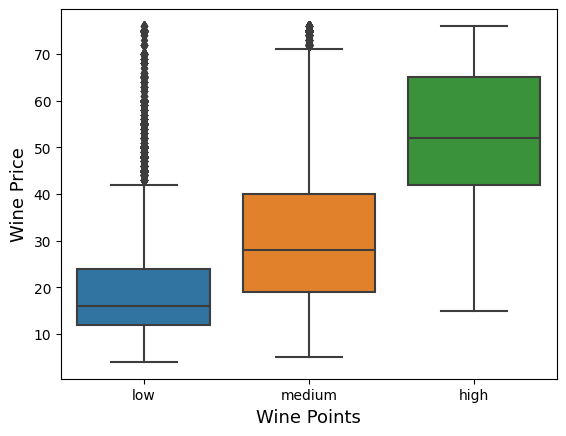

In [12]:
sns.boxplot(x="points", y="price", data= wine_price_new)
plt.xlabel("Wine Points",fontsize =13)
plt.ylabel("Wine Price", fontsize =13)

### Check the price range (min_price, max_price) and mean_price/median_price for each levels

In [13]:
wine_price_low = wine_price_new[wine_price_new["points"] == "low"]
wine_price_medium = wine_price_new[wine_price_new["points"] == "medium"]
wine_price_high = wine_price_new[wine_price_new["points"] == "high"]

display(wine_price_low.describe())
display(wine_price_medium.describe())
display(wine_price_high.describe())

# For low quality wine price = 19.48(4~76)
# For medium quality wine price = 31.27(5~76)
# for high quality wine price = 52.47(15~76)


,price
count,47892.000000
mean,19.476823
std,11.024277
min,4.000000
25%,12.000000
50%,16.000000
75%,24.000000
max,76.000000


,price
count,78795.000000
mean,31.268735
std,15.714854
min,5.000000
25%,19.000000
50%,28.000000
75%,40.000000
max,76.000000


,price
count,2966.000000
mean,52.465273
std,13.980593
min,15.000000
25%,42.000000
50%,52.000000
75%,65.000000
max,76.000000


## Conclusion
We can recommend BlueBerry Winery to set the price(mean value)as below 
* For low quality wine price = 19.48(4~76)
* For medium quality wine price = 31.27(5~76)
* For high quality wine price = 52.47(15~76)